In [1]:
import pandas as pd
import numpy as np

DATA_PATH = "../data/raw/indian_liver_patient.csv"           
df = pd.read_csv(DATA_PATH)                                  

df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [3]:
df['Dataset'].value_counts()
df['Dataset'].value_counts(normalize=True)

Dataset
1    0.713551
2    0.286449
Name: proportion, dtype: float64

In [4]:
df.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
(df.isnull().sum() / len(df)) * 100

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.686106
Dataset                       0.000000
dtype: float64

In [6]:
df.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


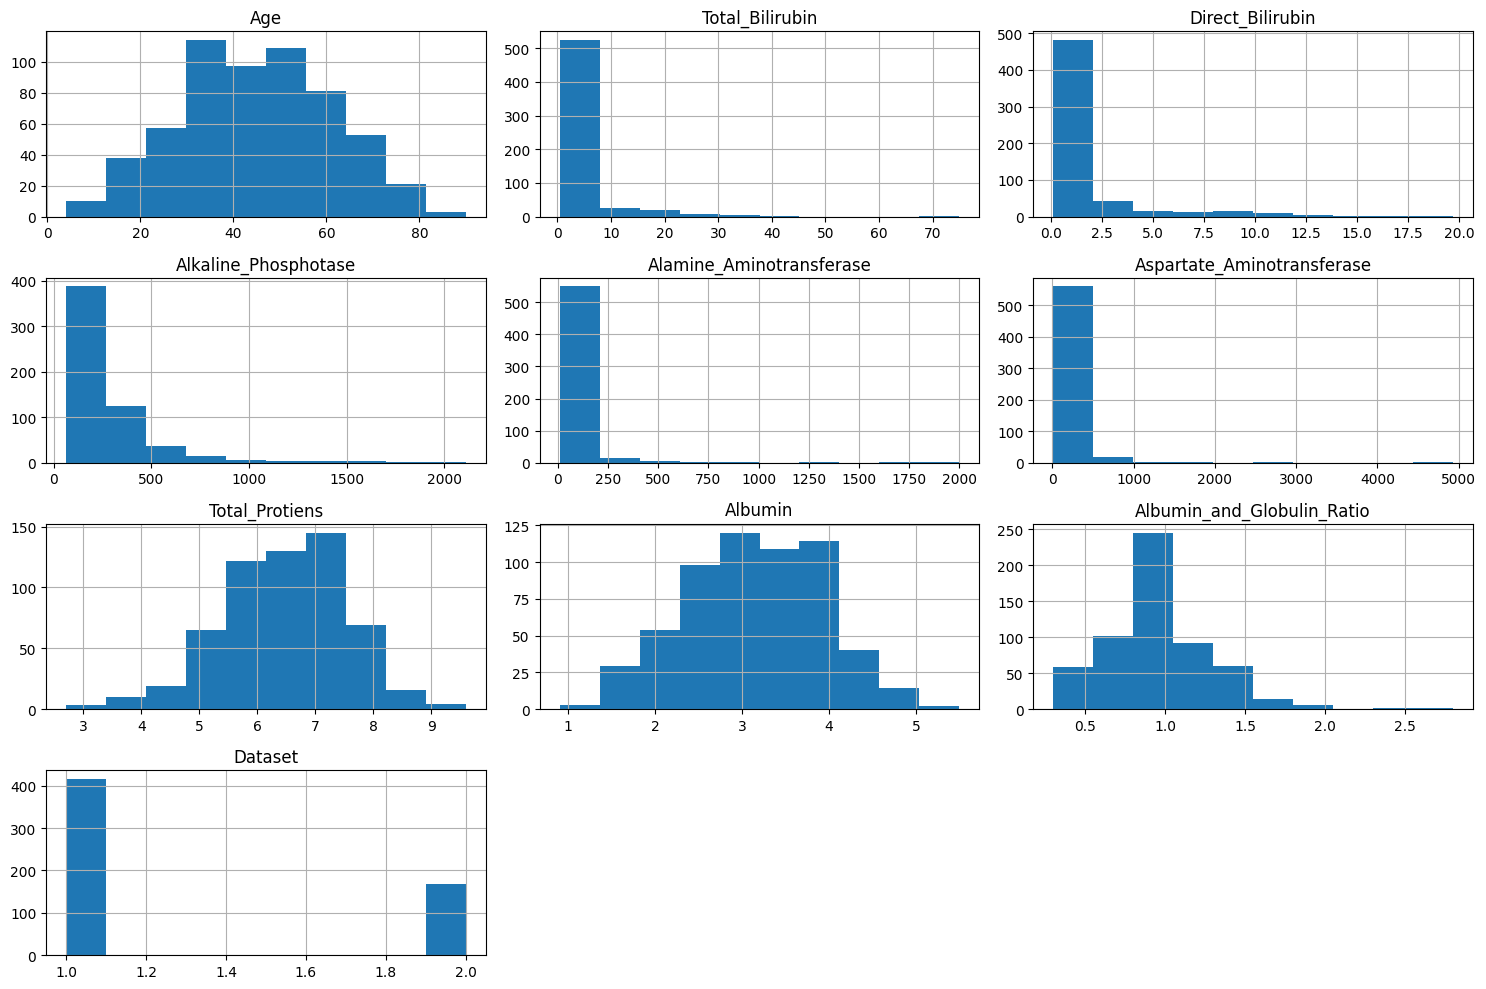

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [8]:
df['Gender'].value_counts()
df['Gender'].value_counts(normalize=True)


Gender
Male      0.756432
Female    0.243568
Name: proportion, dtype: float64

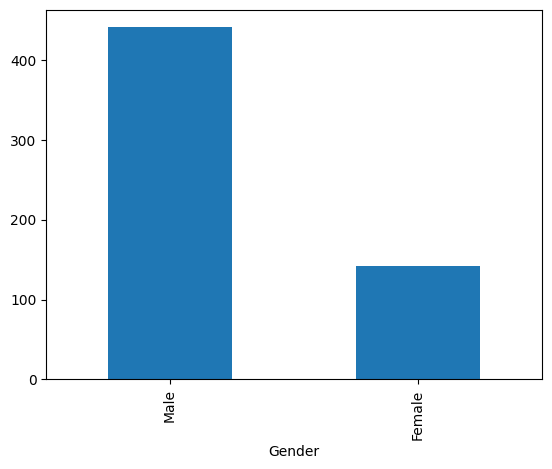

In [9]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()


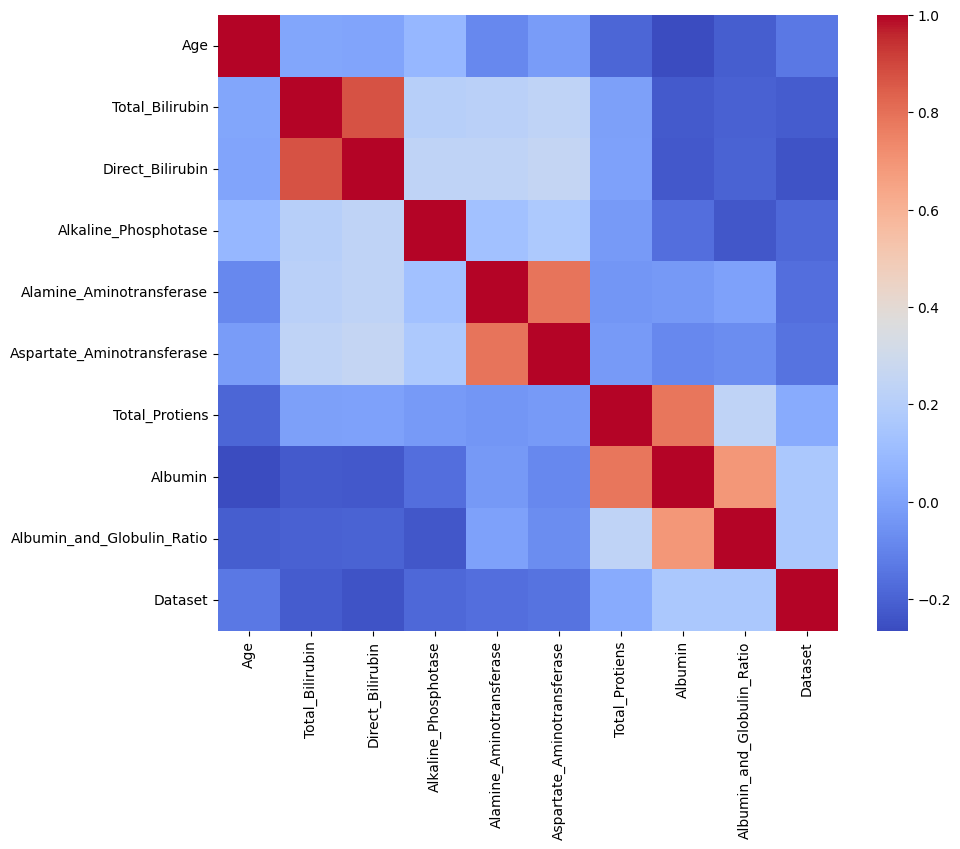

In [10]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.show()


## Data Cleaning
This section performs structural cleaning:
- standardizing column names
- encoding categorical variables
- fixing target labels


In [11]:
df.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [12]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
)
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'dataset'],
      dtype='object')

In [13]:
df['gender'].value_counts()


gender
Male      441
Female    142
Name: count, dtype: int64

In [14]:
df['gender'].unique()


array(['Female', 'Male'], dtype=object)

In [15]:
df['gender'] = (
    df['gender']
    .str.strip()
    .str.lower()
)
df['gender'] = df['gender'].map({
    'male': 1,
    'female': 0
})

df['gender'].value_counts()

gender
1    441
0    142
Name: count, dtype: int64

In [16]:
df['dataset'].value_counts()


dataset
1    416
2    167
Name: count, dtype: int64

In [17]:
df['dataset'] = df['dataset'].map({
    1: 1,  # liver disease
    2: 0   # no disease
})
df['dataset'].value_counts()


dataset
1    416
0    167
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    int64  
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


## Data Imputation
This section handles missing values using statistically and clinically justified methods.


In [19]:
df.isnull().sum()



age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
dataset                       0
dtype: int64

In [20]:
df['albumin_and_globulin_ratio'].describe()


count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: albumin_and_globulin_ratio, dtype: float64

In [21]:
median_ag_ratio = df['albumin_and_globulin_ratio'].median()
median_ag_ratio


np.float64(0.93)

In [22]:
# Median imputation for skewed clinical feature
# Explicit assignment to avoid chained-assignment issues (pandas 3.0 safe)
df['albumin_and_globulin_ratio'] = df['albumin_and_globulin_ratio'].fillna(median_ag_ratio)
df.isnull().sum()



age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
dataset                       0
dtype: int64

In [23]:
X = df.drop(columns=['dataset'])
y = df['dataset']


In [24]:
y.value_counts()


dataset
1    416
0    167
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# Stratified split to preserve class distribution


In [26]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


dataset
1    0.709402
0    0.290598
Name: proportion, dtype: float64

## Train–Test Split
The dataset was split into training (80%) and testing (20%) sets using stratified sampling to preserve the original class distribution. This ensures unbiased evaluation on unseen data.


In [27]:
import sys
!{sys.executable} -m pip install imbalanced-learn


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [29]:
from imblearn.combine import SMOTEENN

# Apply SMOTE-ENN only on training data to handle class imbalance
smote_enn = SMOTEENN(random_state=42)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(
    X_train, y_train
)


In [30]:
y_train_resampled.value_counts()


dataset
0    201
1    154
Name: count, dtype: int64

In [31]:
y_train_resampled.value_counts(normalize=True)


dataset
0    0.566197
1    0.433803
Name: proportion, dtype: float64

In [32]:
print("Original X_train shape:", X_train.shape)
print("After SMOTE-ENN shape:", X_train_resampled.shape)


Original X_train shape: (466, 10)
After SMOTE-ENN shape: (355, 10)


## Class Imbalance Handling
SMOTE-ENN was applied only to the training data after the train–test split to address class imbalance.  
This prevents data leakage while combining synthetic minority oversampling with noise removal.
